In [66]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import openai
import time
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
url = 'https://cla.umn.edu/mgis/mgis-program/job-placement'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
data = [p.text.split('\n')[:-1] for p in soup.find_all('tr')]

In [5]:
data

[['Student Name\xa0\xa0', 'Graduation Date', 'Current Position'],
 ['Mohsen Ahmadkhani',
  'May 2023',
  'Doctoral candidate, Geography Department, University of Minnesota'],
 ['Taylor Andersen-Beaver', 'December 2023', 'Job search in progress'],
 ['Ethan Bott',
  'December 2023',
  'Wildlife GIS Data Steward, MN IT Services, St. Paul, Minnesota'],
 ['Alexander Danielson', 'May 2023', 'GIS Specialist, City of Minneapolis'],
 ['Jake Ford',
  'May 2023',
  'GIS Consulting Senior Associate, ERM, Minneapolis, Minnesota'],
 ['Rob Hendrickson',
  'May 2023',
  'GIS Analyst, Community Air Monitoring Project, City of Minneapolis Health Department'],
 ['Diego Osorio',
  'May 2023',
  'GIS Technician, U-Spatial, University of Minnesota'],
 ['Erik Sauer', 'May 2023', 'GIS Tech, GeoComm, St. Cloud, Minnesota'],
 ['Maochuan Wang',
  'December 2023',
  'GIS Support Analyst, Esri, Charlotte, North Carolina'],
 ['Luke Zaruba',
  'December 2023',
  'Geospatial Consultant, Business Insights & Analytics 

In [6]:
df = pd.DataFrame(data[1:],columns=['Student Name', 'Graduation Date', 'Current Position'])

In [7]:
df['Graduation Date'] = pd.to_datetime(df['Graduation Date'], format='%B %Y', errors='coerce')

In [8]:
df

,Student Name,Graduation Date,Current Position
0,Mohsen Ahmadkhani,2023-05-01,"Doctoral candidate, Geography Department, Univ..."
1,Taylor Andersen-Beaver,2023-12-01,Job search in progress
2,Ethan Bott,2023-12-01,"Wildlife GIS Data Steward, MN IT Services, St...."
3,Alexander Danielson,2023-05-01,"GIS Specialist, City of Minneapolis"
4,Jake Ford,2023-05-01,"GIS Consulting Senior Associate, ERM, Minneapo..."
...,...,...,...
356,Brian Sorbel,2000-06-01,"GIS Specialist, National Park Service, Alaska"
357,Sathyan Srinivasan,2000-01-01,"Senior Program Manager, Intel Corporation, Cha..."
358,Student Name,NaT,Current Position
359,Sonja Johnson,1999-12-01,"Web Analyst/Project Manager, US Bank Corporati..."


In [9]:
header = list(df.columns) # clean up duplicate headers

In [10]:
header

['Student Name', 'Graduation Date', 'Current Position']

In [11]:
df = df[df['Student Name']!='Student Name\xa0\xa0'].copy()

In [12]:
df.head()

,Student Name,Graduation Date,Current Position
0,Mohsen Ahmadkhani,2023-05-01,"Doctoral candidate, Geography Department, Univ..."
1,Taylor Andersen-Beaver,2023-12-01,Job search in progress
2,Ethan Bott,2023-12-01,"Wildlife GIS Data Steward, MN IT Services, St...."
3,Alexander Danielson,2023-05-01,"GIS Specialist, City of Minneapolis"
4,Jake Ford,2023-05-01,"GIS Consulting Senior Associate, ERM, Minneapo..."


In [13]:
df['Graduation Year'] = df['Graduation Date'].dt.year

In [14]:
df.head()

,Student Name,Graduation Date,Current Position,Graduation Year
0,Mohsen Ahmadkhani,2023-05-01,"Doctoral candidate, Geography Department, Univ...",2023.0
1,Taylor Andersen-Beaver,2023-12-01,Job search in progress,2023.0
2,Ethan Bott,2023-12-01,"Wildlife GIS Data Steward, MN IT Services, St....",2023.0
3,Alexander Danielson,2023-05-01,"GIS Specialist, City of Minneapolis",2023.0
4,Jake Ford,2023-05-01,"GIS Consulting Senior Associate, ERM, Minneapo...",2023.0


<AxesSubplot:xlabel='Graduation Year'>

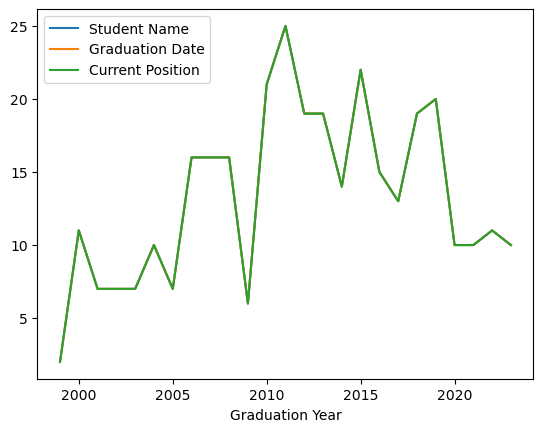

In [15]:
df.groupby('Graduation Year').count().plot()

In [16]:
openai_key = pd.read_csv('api_key.csv').columns[0]

In [22]:
openai.api_key = openai_key

# Reclassify Positions

In [35]:
chat_completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant with deep knowledge of the geographic information science industry."},
        {"role": "user", "content": "Please provide a one word general job class in all lower case for this position description {}".format('GIS Consulting Senior Associate, ERM, Minneapo...')}
    ]
)

print(chat_completion.choices[0].message['content'])

consulting


In [46]:
def gis_job_classifier(text_string):
    chat_completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant with deep knowledge of the geographic information science industry."},
            {"role": "user", "content": "Please provide a one or two word general job class such as 'phd student', 'technician', 'specialist', 'analyst', 'consultant', 'developer', 'manager', or 'other' in all lower case for this position description {}".format(text_string)}
        ]
    )

    return chat_completion.choices[0].message['content']

In [47]:
gis_job_classifier('Wildlife GIS Data Steward, MN IT Services, St..')

'analyst'

In [53]:
classes = []
for position in list(df['Current Position']):
    classes.append(gis_job_classifier(position))
    time.sleep(.5)
    

In [54]:
classes

['phd student',
 'analyst',
 'analyst',
 'specialist',
 'consultant',
 'analyst',
 'technician',
 'technician',
 'analyst',
 'consultant',
 'analyst',
 'analyst',
 'consultant',
 'technician',
 'analyst',
 'consultant',
 'analyst',
 'analyst',
 'developer',
 'analyst',
 'analyst',
 'analyst',
 'analyst',
 'analyst',
 'consultant',
 'consultant',
 'analyst',
 'phd student',
 'developer',
 'researcher',
 'analyst, manager',
 "master's student",
 'technician',
 'technician',
 'analyst-manager',
 'manager',
 'consultant',
 'analyst',
 'assistant',
 'instructor',
 'associate',
 'analyst',
 'consultant',
 'analyst, manager',
 'phd student',
 'analyst',
 'analyst',
 'scientist',
 'developer',
 'analyst',
 'analyst',
 'analyst',
 'consultant',
 'engineer',
 'researcher',
 'analyst',
 'analyst',
 'specialist',
 'technician',
 'analyst',
 'analyst',
 'phd student',
 'engineer',
 'student',
 'scientist',
 'cartographer',
 'phd student',
 'analyst',
 'researcher',
 'analyst',
 'analyst',
 'develop

In [55]:
df['Job Labels'] = classes

# Quality Check

In [56]:
sample = df.sample(n=20, random_state=1)

In [57]:
sample

,Student Name,Graduation Date,Current Position,Graduation Year,Job Labels
108,Daniel Heins,2016-05-01,"UAS Coordinator, Department of Forest Resource...",2016.0,coordinator
132,Paul Paddock,2015-12-01,"Emergency Management Services (GIS), FEMA, Blo...",2015.0,analyst
11,Cole Anderson,2022-05-01,"Geospatial Analyst, Taskar Center for Accessib...",2022.0,analyst
262,Andres Munoz,2008-08-01,"GIS Consultant, United Nations, Madrid, Spain",2008.0,consultant
252,David Bryson,2008-05-01,"Principal Competitive Intelligence Analyst, Sp...",2008.0,analyst
356,Brian Sorbel,2000-06-01,"GIS Specialist, National Park Service, Alaska",2000.0,specialist
119,Christopher Brink,2015-05-01,GIS Production Specialist/Journeyman Cartograp...,2015.0,analyst
156,Gayatri Alapati,2013-12-01,"GIS Developer, VNuIT, San Diego, California",2013.0,developer
94,Jeremy Moore,2017-03-01,"President and Owner, Elevate GIS Solutions, Mi...",2017.0,owner
183,Michael Lau,2012-07-01,"Senior Product Engineer, ArcGIS Pro Scene Laye...",2012.0,engineer


In [60]:
df.groupby(['Graduation Year', 'Job Labels']).count()

Student Name  Graduation Date  \
Graduation Year Job Labels                                             
1999.0          analyst                           1                1   
                engineer                          1                1   
2000.0          analyst                           2                2   
                consultant                        2                2   
                coordinator                       2                2   
                manager                           3                3   
                professor                         1                1   
                specialist                        1                1   
2001.0          analyst                           4                4   
                manager                           3                3   
2002.0          analyst                           2                2   
                coordinator                       1                1   
                forecaster                        1                1   
                manager                           2                2   
                technician & lecturer             1                1   
2003.0          consultant                        1                1   
                manager                           3                3   
                professor                         1                1   
                specialist                        2                2   
2004.0          administrator                     1                1   
                analyst                           4                4   
                manager                           4                4   
                professor                         1                1   
2005.0          administrator                     1                1   
                analyst                           2                2   
                engineer                          1                1   
                manager                           1                1   
                professor                         1                1   
                specialist                        1                1   
2006.0          analyst                           4                4   
                coordinator                       1                1   
                developer                         1                1   
                founder                           1                1   
                manager                           7                7   
                professor                         1                1   
                researcher                        1                1   
2007.0          analyst                           3                3   
                attorney                          1                1   
                chief architect                   1                1   
                coach                             1                1   
                consultant                        3                3   
                coordinator                       1                1   
                developer                         1                1   
                director                          1                1   
                engineer                          1                1   
                manager                           1                1   
                specialist                        1                1   
                technician                        1                1   
2008.0          analyst                           7                7   
                consultant                        2                2   
                coordinator                       1                1   
                director                          1                1   
                manager                           4                4   
                specialist                        1                1   
2009.0 

In [61]:
df.tail()

,Student Name,Graduation Date,Current Position,Graduation Year,Job Labels
355,Jason Seifert,2000-08-01,"GIS Coordinator, Alaska Department of Environm...",2000.0,coordinator
356,Brian Sorbel,2000-06-01,"GIS Specialist, National Park Service, Alaska",2000.0,specialist
357,Sathyan Srinivasan,2000-01-01,"Senior Program Manager, Intel Corporation, Cha...",2000.0,manager
359,Sonja Johnson,1999-12-01,"Web Analyst/Project Manager, US Bank Corporati...",1999.0,analyst
360,Aaron Timbo,1999-12-01,"Senior Cloud Engineer, Smart Things, Minneapol...",1999.0,engineer


In [69]:
set(df['Job Labels'])

{'account manager',
 'administrator',
 'advisor',
 'analyst',
 'analyst, manager',
 'analyst-manager',
 'assistant',
 'associate',
 'attorney',
 'biologist',
 'business analyst',
 'cartographer',
 'chief architect',
 'coach',
 'consultant',
 'coordinator',
 'designer',
 'developer',
 'director',
 'editor',
 'engineer',
 'executive',
 'forecaster',
 'founder',
 'geologist',
 'instructor',
 'landscape architect',
 'manager',
 "master's student",
 'owner',
 'phd student',
 'professor',
 'research scientist',
 'researcher',
 'scientist',
 'specialist',
 'student',
 'surveyor',
 'technician',
 'technician & lecturer'}

In [80]:
job_counts = df[df['Graduation Date']<pd.to_datetime('2010')]['Job Labels'].value_counts()

In [81]:
job_counts

analyst                  32
manager                  29
consultant                8
specialist                6
coordinator               6
professor                 5
engineer                  5
director                  2
developer                 2
administrator             2
forecaster                1
founder                   1
technician                1
researcher                1
chief architect           1
attorney                  1
coach                     1
technician & lecturer     1
Name: Job Labels, dtype: int64

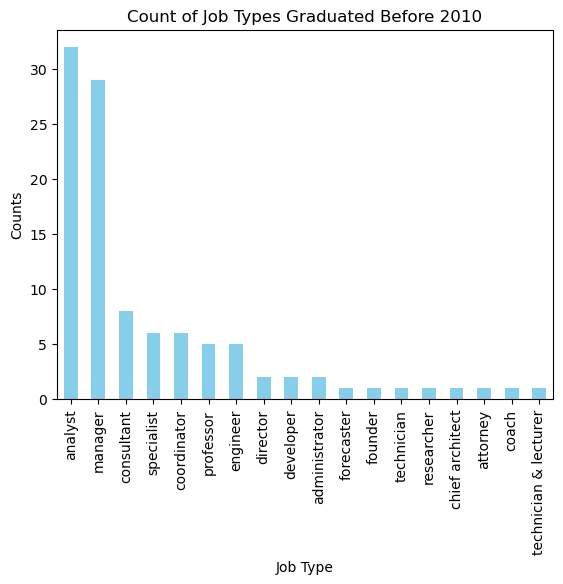

In [83]:
job_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Job Types Graduated Before 2010')
plt.xlabel('Job Type')
plt.ylabel('Counts')
plt.show()

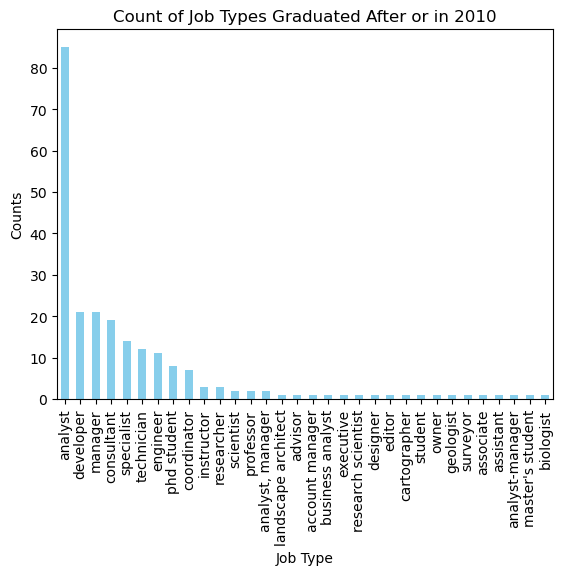

In [84]:
job_counts = df[df['Graduation Date']>=pd.to_datetime('2010')]['Job Labels'].value_counts()
job_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Job Types Graduated After or in 2010')
plt.xlabel('Job Type')
plt.ylabel('Counts')
plt.show()

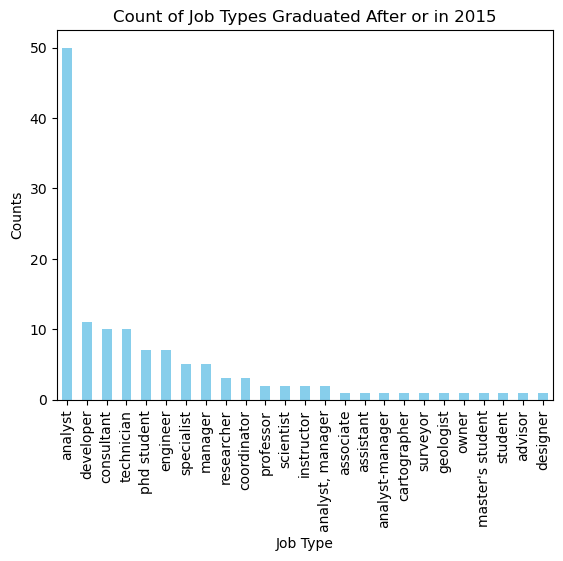

In [85]:
job_counts = df[df['Graduation Date']>=pd.to_datetime('2015')]['Job Labels'].value_counts()
job_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Job Types Graduated After or in 2015')
plt.xlabel('Job Type')
plt.ylabel('Counts')
plt.show()